#### Problem Statement
#### Output variable -> y
#### y -> Whether the client has subscribed a term deposit or not 
#### Binomial ("yes" or "no")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing data
new_df = pd.read_csv(r"bank-full.csv", sep=';')

In [4]:
new_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [5]:
new_df.shape

(45211, 17)

In [6]:
# Checking datatypes
new_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
# Checking dupliacte values
new_df[new_df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [8]:
# Finding Missing Values
new_df[new_df.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [9]:
new_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# Rearranged dataframe 

new_df = new_df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'default', 'housing', 'loan', 'marital', 'contact', 'education', 'poutcome', 'job', 'month', 'y']]

In [11]:
new_df.head(2)

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,marital,contact,education,poutcome,job,month,y
0,58,2143,5,261,1,-1,0,no,yes,no,married,unknown,tertiary,unknown,management,may,no
1,44,29,5,151,1,-1,0,no,yes,no,single,unknown,secondary,unknown,technician,may,no


In [12]:
# Dataframe to check the outliers for the continuous variable.

new_df1 = new_df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

### Using Box Plot to detect the outliers

Indices of outliers from the box plots:
[32768, 32770, 32775, 32776, 32781, 32782, 32786, 32787, 32789, 32791, 32793, 32797, 32798, 32799, 32800, 32801, 32802, 34, 32804, 37, 32806, 32809, 32810, 43, 32811, 32817, 32818, 32819, 32820, 53, 32822, 32823, 32824, 32825, 32826, 59, 32827, 61, 32830, 32832, 65, 32834, 32835, 32836, 69, 70, 32838, 32840, 32842, 32844, 32847, 83, 32852, 32853, 86, 32855, 87, 32854, 32858, 32856, 32857, 32860, 32865, 32867, 32869, 32873, 32875, 32876, 109, 32879, 32882, 32883, 32886, 32889, 32892, 32895, 32897, 130, 32899, 32900, 32901, 32902, 32903, 32905, 32906, 32907, 32909, 32910, 32911, 32914, 32919, 152, 32923, 32926, 32929, 32930, 32932, 168, 32936, 170, 32937, 32940, 32941, 32939, 32944, 179, 181, 182, 32950, 32951, 32953, 186, 187, 32954, 32955, 32956, 32959, 32957, 32960, 32961, 32963, 32965, 32966, 32967, 32969, 32971, 205, 32974, 32973, 32976, 32977, 32978, 32979, 32980, 32982, 32983, 32985, 32986, 32990, 32991, 224, 32992, 32993, 32995, 32996, 3299

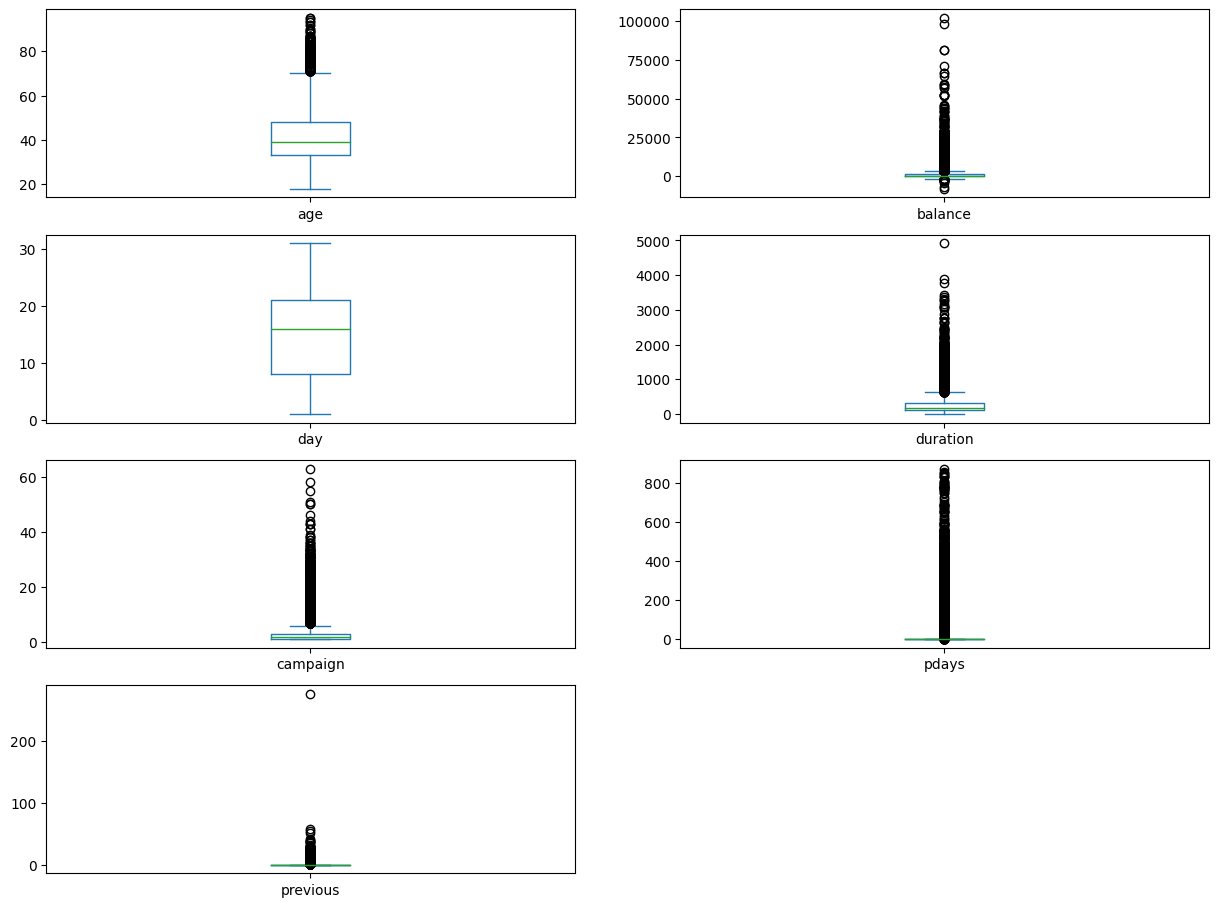

In [14]:
# Box plot find the outliers 

box_plot = new_df1.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = new_df1.quantile(0.25)
Q3 = new_df1.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(new_df1.columns, box_plot):
    outliers = ((new_df1[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (new_df1[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = new_df1.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

### Using IQR to detect the outliers

In [15]:
# Calculate quartiles and IQR for each column
Q1 = new_df1.quantile(0.25)
Q3 = new_df1.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outlier indices for each column
outlier_indices = []
for column in new_df1.columns:
    column_outliers = new_df1[(new_df1[column] < Q1[column] - outlier_threshold[column]) | 
                         (new_df1[column] > Q3[column] + outlier_threshold[column])].index
    outlier_indices.extend(column_outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Outlier Indices:", outlier_indices)
print(len(outlier_indices))


Outlier Indices: [32768, 32770, 32775, 32776, 32781, 32782, 32786, 32787, 32789, 32791, 32793, 32797, 32798, 32799, 32800, 32801, 32802, 34, 32804, 37, 32806, 32809, 32810, 43, 32811, 32817, 32818, 32819, 32820, 53, 32822, 32823, 32824, 32825, 32826, 59, 32827, 61, 32830, 32832, 65, 32834, 32835, 32836, 69, 70, 32838, 32840, 32842, 32844, 32847, 83, 32852, 32853, 86, 32855, 87, 32854, 32858, 32856, 32857, 32860, 32865, 32867, 32869, 32873, 32875, 32876, 109, 32879, 32882, 32883, 32886, 32889, 32892, 32895, 32897, 130, 32899, 32900, 32901, 32902, 32903, 32905, 32906, 32907, 32909, 32910, 32911, 32914, 32919, 152, 32923, 32926, 32929, 32930, 32932, 168, 32936, 170, 32937, 32940, 32941, 32939, 32944, 179, 181, 182, 32950, 32951, 32953, 186, 187, 32954, 32955, 32956, 32959, 32957, 32960, 32961, 32963, 32965, 32966, 32967, 32969, 32971, 205, 32974, 32973, 32976, 32977, 32978, 32979, 32980, 32982, 32983, 32985, 32986, 32990, 32991, 224, 32992, 32993, 32995, 32996, 32997, 32998, 231, 232, 330

### Using Z-Scores to detect the outliers

In [16]:
# Calculate mean and standard deviation for each column
means = new_df1.mean()
stds = new_df1.std()

# Define Z-score threshold (e.g., ±2 or ±3)
z_score_threshold = 3

# Identify outlier indices for each column
outlier_indices = []
for column in new_df1.columns:
    z_scores = np.abs((new_df1[column] - means[column]) / stds[column])
    column_outliers = z_scores[z_scores > z_score_threshold].index
    outlier_indices.extend(column_outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Outlier Indices:", outlier_indices)
print(len(outlier_indices))

Outlier Indices: [32786, 32793, 32798, 34, 37, 32806, 43, 32817, 32818, 32822, 32823, 59, 32830, 32832, 32834, 69, 83, 32852, 86, 87, 32858, 32865, 32875, 32886, 32900, 32906, 32914, 152, 32929, 32936, 170, 32939, 182, 32950, 32954, 32963, 32965, 32966, 32977, 32983, 32986, 32991, 224, 32993, 33008, 33017, 33032, 33048, 33050, 33054, 33061, 33073, 33074, 33078, 33087, 33089, 33100, 334, 33105, 33113, 33114, 33115, 33129, 33137, 33143, 33149, 33152, 388, 33160, 33165, 33173, 33175, 33213, 446, 33218, 474, 33245, 33254, 33263, 33270, 33279, 33294, 33312, 33320, 33329, 569, 33347, 33354, 33360, 600, 33369, 33388, 33405, 33414, 33419, 33420, 33424, 33433, 33454, 33455, 694, 33472, 33475, 33479, 33480, 33486, 33487, 33489, 33491, 728, 33505, 33517, 33519, 33536, 33538, 33544, 33551, 33569, 33573, 33583, 33590, 33591, 33592, 33598, 33599, 33603, 33606, 33609, 853, 33626, 33627, 33629, 33631, 33634, 877, 33652, 33673, 33677, 33684, 920, 33698, 33699, 33703, 33706, 33719, 960, 33739, 33751, 33

### Calculating the range for the continuous variable to check the outliers. 

In [17]:
# Calculate the range using NumPy
print("Range of age :",min(new_df1["age"]),"to", max(new_df1['age']))
print("Range of balance :",min(new_df1["balance"]),"to", max(new_df1['balance']))
print("Range of day :",min(new_df1["day"]),"to", max(new_df1['day']))
print("Range of duration :",min(new_df1["duration"]),"to", max(new_df1['duration']))
print("Range of campaign :",min(new_df1["campaign"]),"to", max(new_df1['campaign']))
print("Range of pdays :",min(new_df1["pdays"]),"to", max(new_df1['pdays']))
print("Range of previous :",min(new_df1["previous"]),"to", max(new_df1['previous']))

Range of age : 18 to 95
Range of balance : -8019 to 102127
Range of day : 1 to 31
Range of duration : 0 to 4918
Range of campaign : 1 to 63
Range of pdays : -1 to 871
Range of previous : 0 to 275


#### Even though the outlier methods shows so many records as outliers, it is important to consider the domain knowleage to treat or change any records in the dataset.

#### We need to carefully consider each feature and we need to treat the outliers accordling.

#### 1. Feature Age has outliers but none of the value is negative. The values range from 18 to 95 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 2. Feature Balance has outliers but none of the value is negative. The values range from -8019 to 102127 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 3. Feature Day has no outliers. Hence no outlier treatment is required.

#### 4. Feature Duration has outliers but none of the value is negative. The values range from 0 to 4918 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 5. Feature Campaign has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable records

#### 6. Feature PDays has outliers but none of the value is negative. The values range from -1 to 871 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 7. Feature Previous has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable records


In [18]:
# Create a copy of the DataFrame
new_df2 = new_df.copy()

In [19]:
new_df2.head(2)

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,marital,contact,education,poutcome,job,month,y
0,58,2143,5,261,1,-1,0,no,yes,no,married,unknown,tertiary,unknown,management,may,no
1,44,29,5,151,1,-1,0,no,yes,no,single,unknown,secondary,unknown,technician,may,no


### Manually finding the extreme outliers and replacing with the median value.

In [20]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record1 = new_df[new_df["previous"] > 100]
record2 = new_df[new_df["duration"] > 4000]
print(record1, record2)

       age  balance  day  duration  campaign  pdays  previous default housing  \
29182   40      543    2       349         2    262       275      no     yes   

      loan  marital   contact education poutcome         job month   y  
29182   no  married  cellular  tertiary    other  management   feb  no          age  balance  day  duration  campaign  pdays  previous default housing  \
24148   59     6573   10      4918         1     -1         0      no     yes   

      loan  marital    contact education poutcome         job month   y  
24148   no  married  telephone  tertiary  unknown  technician   nov  no  


In [21]:
# Feature name to update
feature_to_update = "previous"

# Calculate the median using pandas
median_previous = new_df[feature_to_update].median()

# Index of the record you want to update
record_index_to_update = 29182  # For example, updating the second record

# Update the record with the median value
new_df.at[record_index_to_update, feature_to_update] = median_previous

In [22]:
# Feature name to update
feature_to_update = "duration"

# Calculate the median using pandas
median_previous = new_df[feature_to_update].median()

# Index of the record you want to update
record_index_to_update = 24148  # For example, updating the second record

# Update the record with the median value
new_df.at[record_index_to_update, feature_to_update] = median_previous

In [23]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record1 = new_df[new_df["previous"] > 100]
record2 = new_df[new_df["duration"] > 4000]
print(record1, record2)

Empty DataFrame
Columns: [age, balance, day, duration, campaign, pdays, previous, default, housing, loan, marital, contact, education, poutcome, job, month, y]
Index: [] Empty DataFrame
Columns: [age, balance, day, duration, campaign, pdays, previous, default, housing, loan, marital, contact, education, poutcome, job, month, y]
Index: []


### Calculating the range for the continuous variable after outlier treatment.

In [24]:
# Calculate the range using NumPy
print("Range of age :",min(new_df["age"]),"to", max(new_df['age']))
print("Range of balance :",min(new_df["balance"]),"to", max(new_df['balance']))
print("Range of day :",min(new_df["day"]),"to", max(new_df['day']))
print("Range of duration :",min(new_df["duration"]),"to", max(new_df['duration']))
print("Range of campaign :",min(new_df["campaign"]),"to", max(new_df['campaign']))
print("Range of pdays :",min(new_df["pdays"]),"to", max(new_df['pdays']))
print("Range of previous :",min(new_df["previous"]),"to", max(new_df['previous']))

Range of age : 18 to 95
Range of balance : -8019 to 102127
Range of day : 1 to 31
Range of duration : 0 to 3881
Range of campaign : 1 to 63
Range of pdays : -1 to 871
Range of previous : 0 to 58


In [25]:
new_df.head(2)

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,marital,contact,education,poutcome,job,month,y
0,58,2143,5,261,1,-1,0,no,yes,no,married,unknown,tertiary,unknown,management,may,no
1,44,29,5,151,1,-1,0,no,yes,no,single,unknown,secondary,unknown,technician,may,no


### Box plot after outlier treatment.

Indices of outliers from the box plots:
[32768, 32770, 32775, 32776, 32781, 32782, 32786, 32787, 32789, 32791, 32793, 32797, 32798, 32799, 32800, 32801, 32802, 34, 32804, 37, 32806, 32809, 32810, 43, 32811, 32817, 32818, 32819, 32820, 53, 32822, 32823, 32824, 32825, 32826, 59, 32827, 61, 32830, 32832, 65, 32834, 32835, 32836, 69, 70, 32838, 32840, 32842, 32844, 32847, 83, 32852, 32853, 86, 32855, 87, 32854, 32858, 32856, 32857, 32860, 32865, 32867, 32869, 32873, 32875, 32876, 109, 32879, 32882, 32883, 32886, 32889, 32892, 32895, 32897, 130, 32899, 32900, 32901, 32902, 32903, 32905, 32906, 32907, 32909, 32910, 32911, 32914, 32919, 152, 32923, 32926, 32929, 32930, 32932, 168, 32936, 170, 32937, 32940, 32941, 32939, 32944, 179, 181, 182, 32950, 32951, 32953, 186, 187, 32954, 32955, 32956, 32959, 32957, 32960, 32961, 32963, 32965, 32966, 32967, 32969, 32971, 205, 32974, 32973, 32976, 32977, 32978, 32979, 32980, 32982, 32983, 32985, 32986, 32990, 32991, 224, 32992, 32993, 32995, 32996, 3299

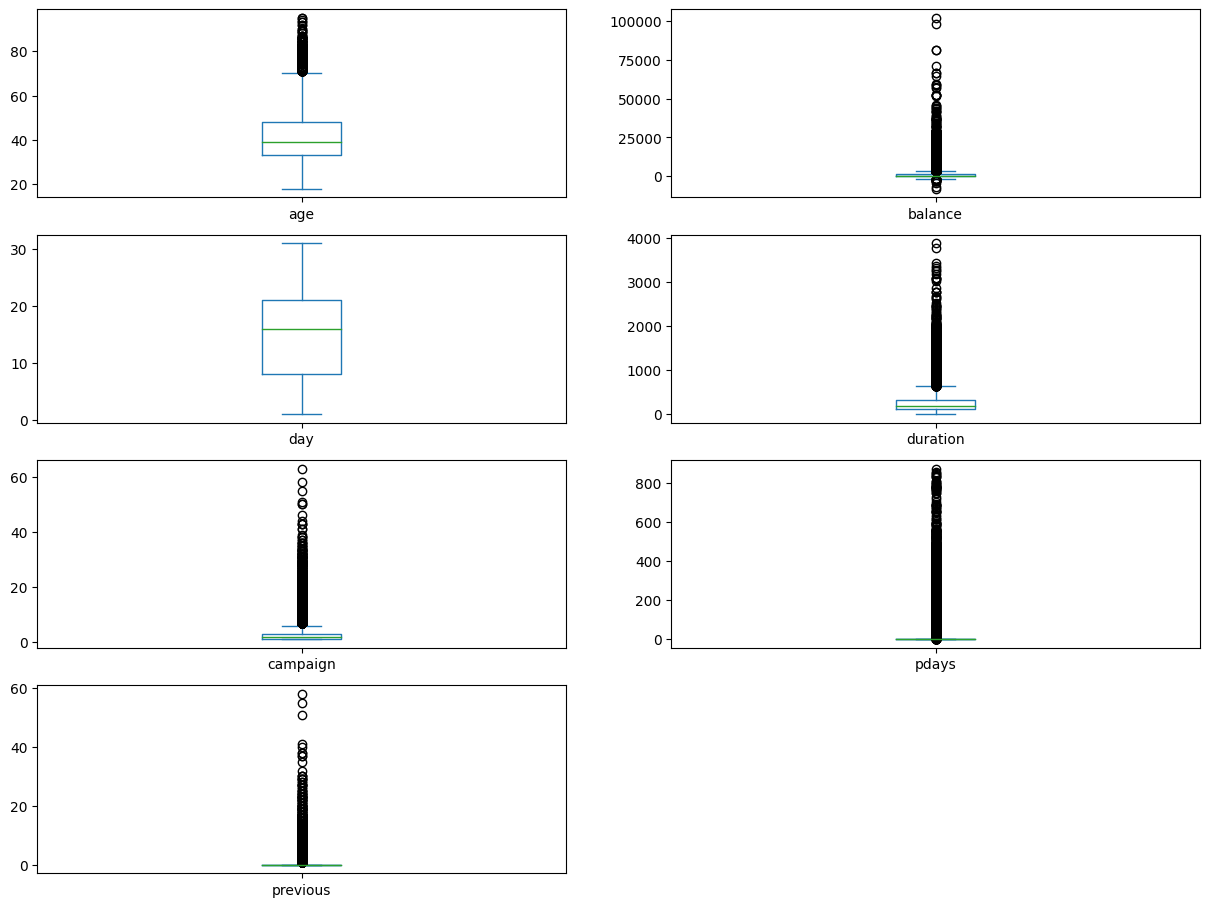

In [26]:
# Box plot find the outliers 

box_plot = new_df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(new_df.columns, box_plot):
    outliers = ((new_df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (new_df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = new_df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

In [27]:
new_df.head(5)

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,marital,contact,education,poutcome,job,month,y
0,58,2143,5,261,1,-1,0,no,yes,no,married,unknown,tertiary,unknown,management,may,no
1,44,29,5,151,1,-1,0,no,yes,no,single,unknown,secondary,unknown,technician,may,no
2,33,2,5,76,1,-1,0,no,yes,yes,married,unknown,secondary,unknown,entrepreneur,may,no
3,47,1506,5,92,1,-1,0,no,yes,no,married,unknown,unknown,unknown,blue-collar,may,no
4,33,1,5,198,1,-1,0,no,no,no,single,unknown,unknown,unknown,unknown,may,no


### In the next step the dataframe is split into two dataframes namely continuous variable dataframe and categorical variable dataframe. 

### Continuous variable dataframe will be checked for multicollinearity and kind of distribution each variable has. Based on the distribution either normalization or the standardization will be applied.

### Categorical variable dataframe will undergo one hot encoder and label encoder for the categorical variables.

### These dataframes will be mearged after these pre processing steps. 

## Splitting of dataframe. 

In [28]:
# Dataframe to check the outliers for the continuous variable.

cont_df = new_df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
cate_df = new_df[["default", "housing", "loan", "marital", "contact", "education", "poutcome", "job", "month", "y"]]

### Pre-processing of continuous variable dataframe. 

In [29]:
# Correlation matrix to check the multi collinearity of the features
cont_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.005360,0.004760,-0.023758,0.001836
balance,0.097783,1.000000,0.004503,0.020940,-0.014578,0.003435,0.020988
day,-0.009120,0.004503,1.000000,-0.030031,0.162490,-0.093044,-0.057142
duration,-0.005360,0.020940,-0.030031,1.000000,-0.084645,-0.001402,0.000452
campaign,0.004760,-0.014578,0.162490,-0.084645,1.000000,-0.088628,-0.038881
pdays,-0.023758,0.003435,-0.093044,-0.001402,-0.088628,1.000000,0.542047
previous,0.001836,0.020988,-0.057142,0.000452,-0.038881,0.542047,1.000000


<AxesSubplot: >

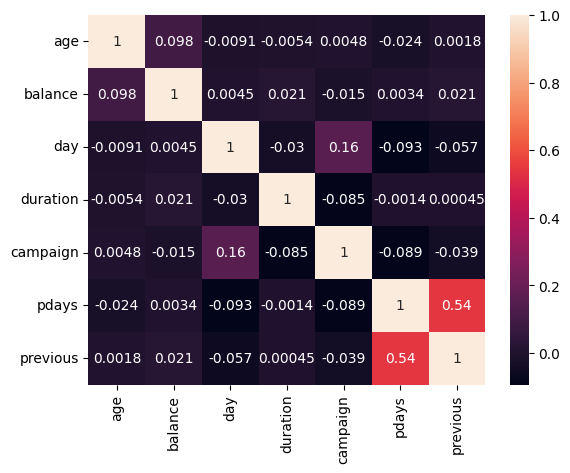

In [30]:
# Heatmaps for the given dataset.
sns.heatmap(cont_df.corr(), annot=True)

### None of the value is near or equal to 1 or -1 for the continuous features. Hence no multicolinearity present.

In [31]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(cont_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
    feature       VIF
0       age  5.008437
1   balance  1.213126
2       day  3.984641
3  duration  1.906318
4  campaign  1.824784
5     pdays  1.635848
6  previous  1.545763


### VIF value for all the features is very low. Hence all the variables are significant and there is no presence of multicollinearity.

### From both the correlation matrix and the VIF value show that none of the feature depend on each other. Hence there is no multicollinearity present in the dataset.

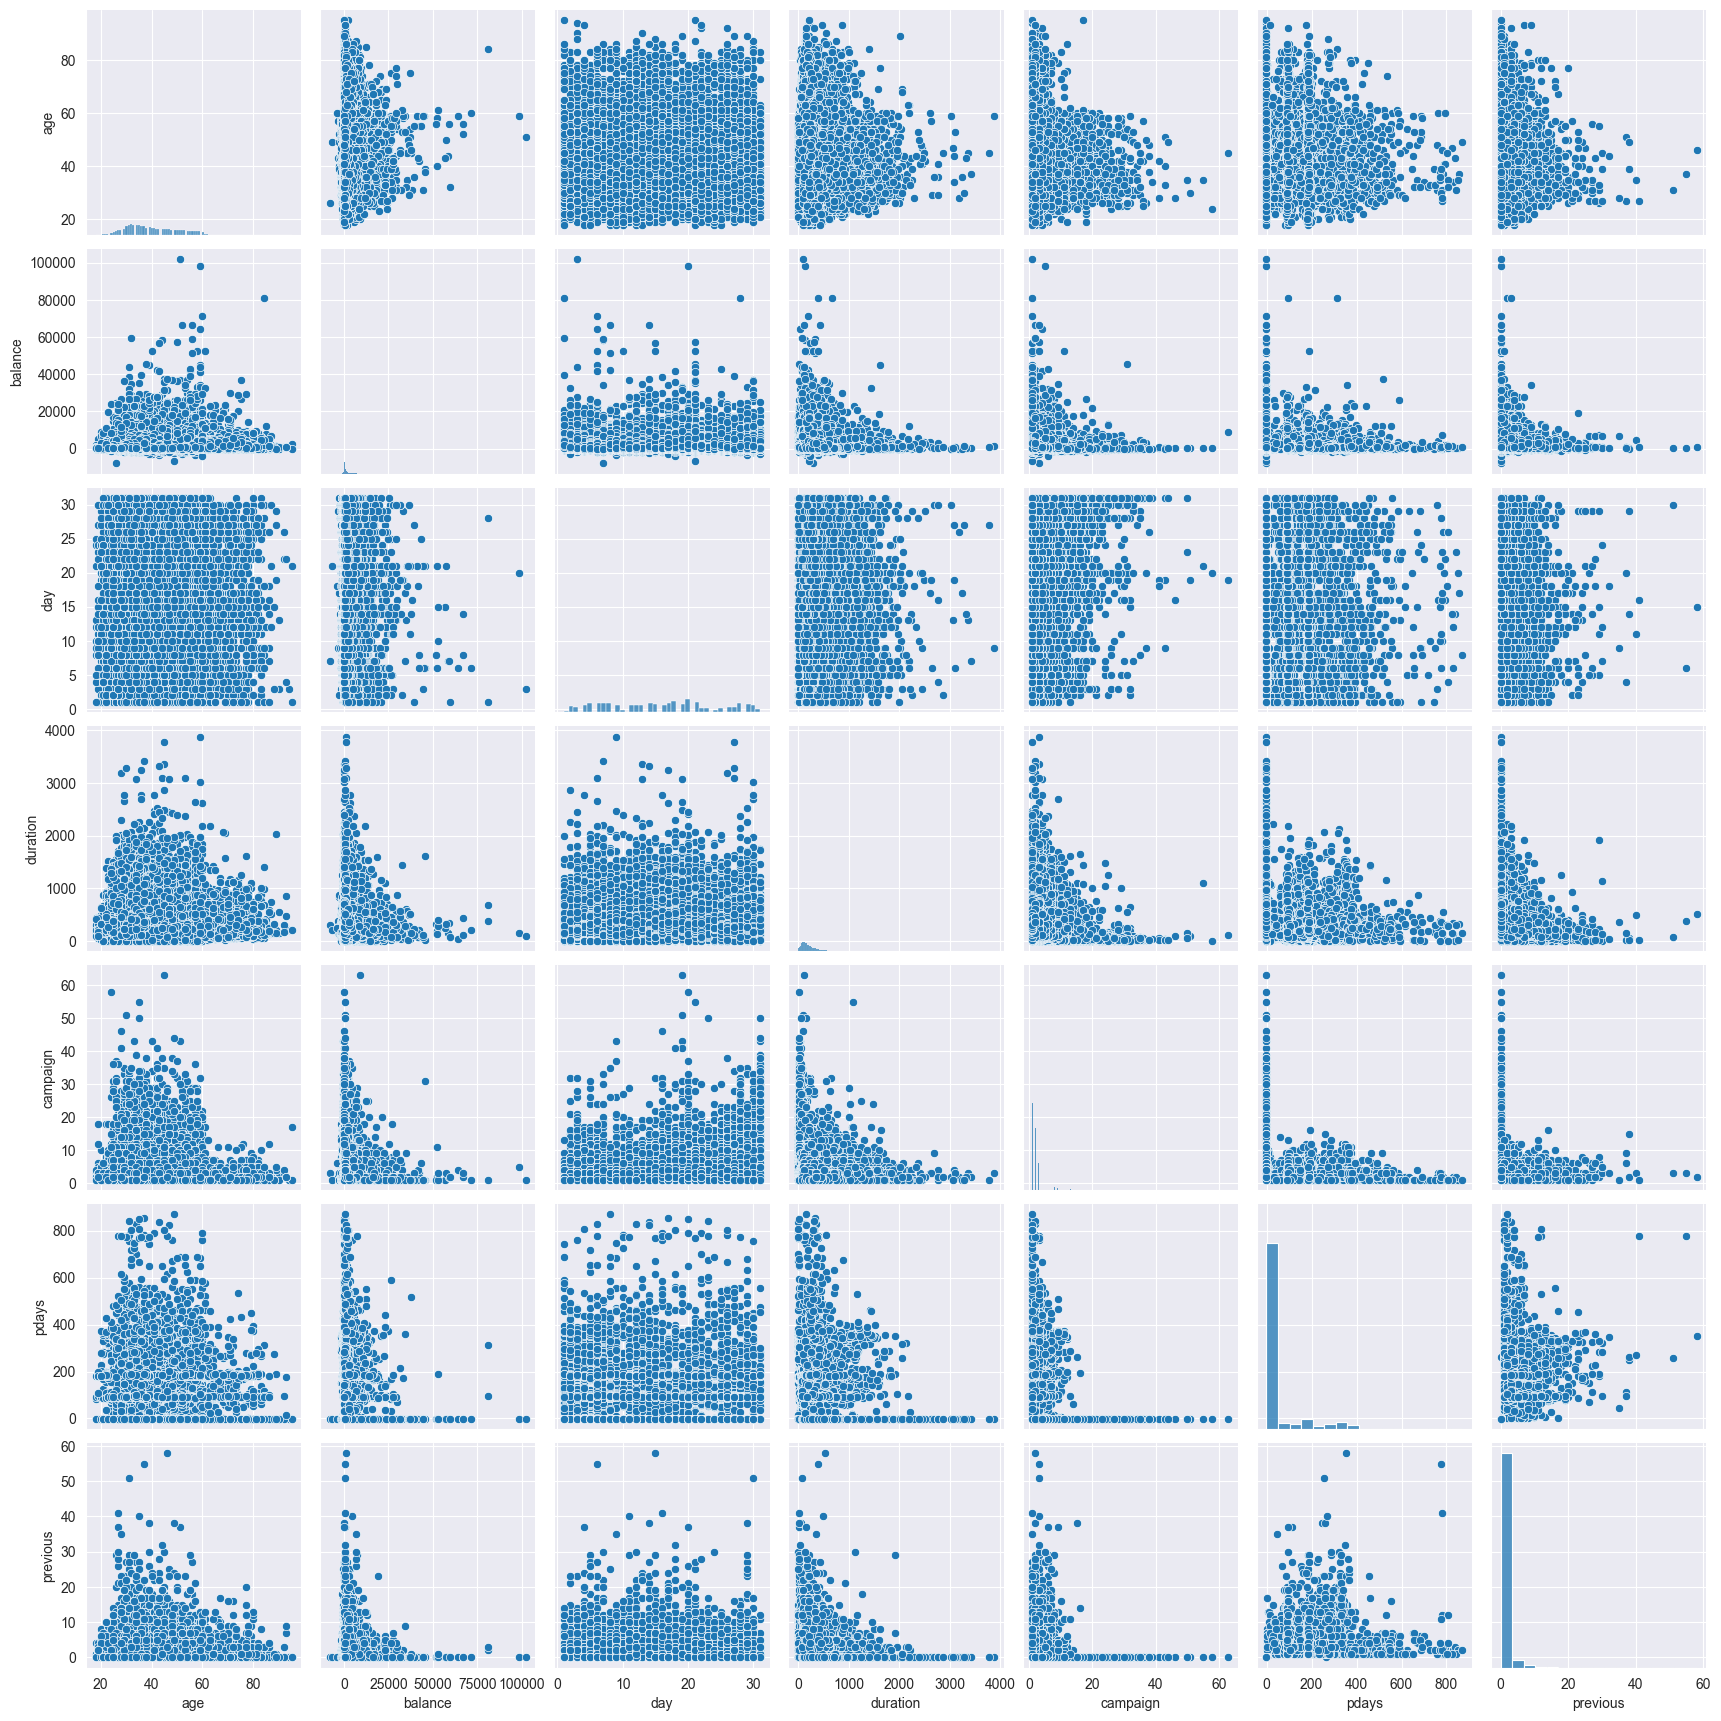

In [32]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cont_df)

### Most of the histogram shows that the features are not normally distributed.

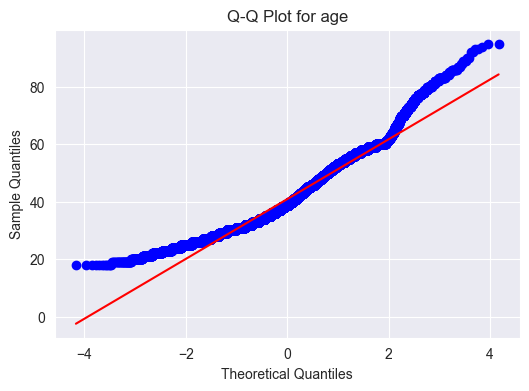

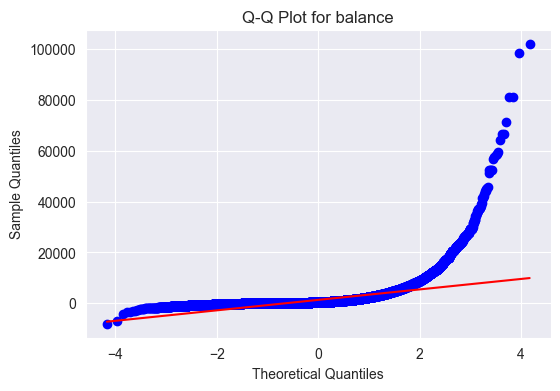

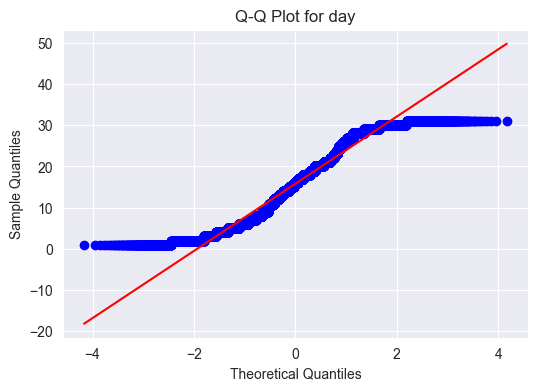

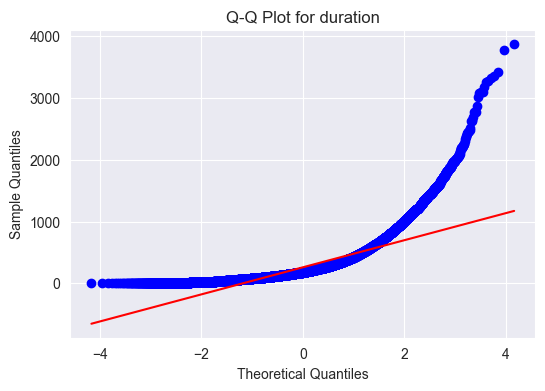

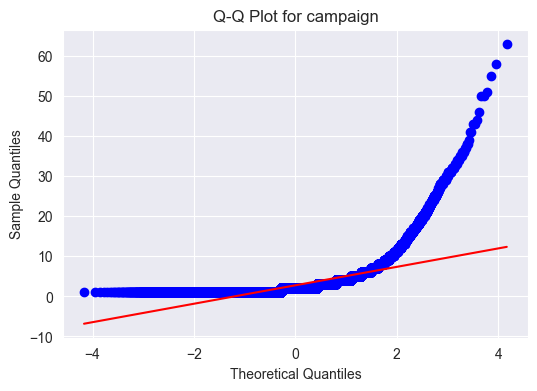

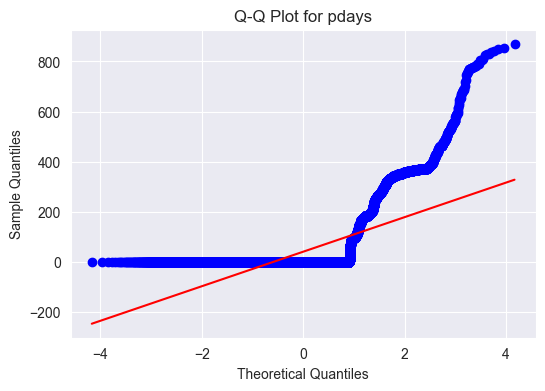

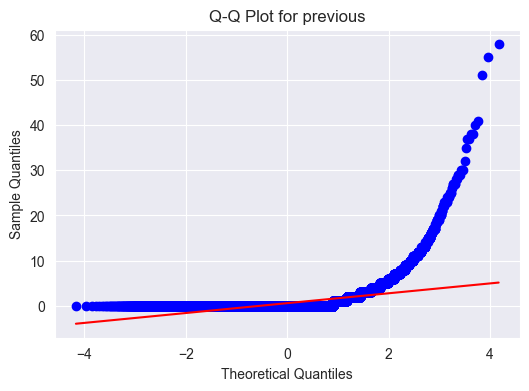

In [33]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in cont_df.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(cont_df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

### Most of the Q-Q plot shows that features are not normally distributed.

### Hence we can use Normalization for transformation.

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Normalization
min_max_scaler = MinMaxScaler()

# Fit and transform the data using standardization
normalized_data_minmax = min_max_scaler.fit_transform(cont_df)


# Create a new DataFrame with the standardized data
norm_df = pd.DataFrame(normalized_data_minmax, columns = cont_df.columns)

In [35]:
norm_df

,age,balance,day,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.067251,0.000000,0.000000,0.000000
1,0.337662,0.073067,0.133333,0.038907,0.000000,0.000000,0.000000
2,0.194805,0.072822,0.133333,0.019583,0.000000,0.000000,0.000000
3,0.376623,0.086476,0.133333,0.023705,0.000000,0.000000,0.000000
4,0.194805,0.072812,0.133333,0.051018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.251739,0.032258,0.000000,0.000000
45207,0.688312,0.088501,0.533333,0.117495,0.016129,0.000000,0.000000
45208,0.701299,0.124689,0.533333,0.290389,0.064516,0.212156,0.051724
45209,0.506494,0.078868,0.533333,0.130894,0.048387,0.000000,0.000000


### Pre-processing of Categorical variable dataframe.

In [37]:
cate_df.head(5)

,default,housing,loan,marital,contact,education,poutcome,job,month,y
0,no,yes,no,married,unknown,tertiary,unknown,management,may,no
1,no,yes,no,single,unknown,secondary,unknown,technician,may,no
2,no,yes,yes,married,unknown,secondary,unknown,entrepreneur,may,no
3,no,yes,no,married,unknown,unknown,unknown,blue-collar,may,no
4,no,no,no,single,unknown,unknown,unknown,unknown,may,no


### Applying Label encoder to default column as it has only two categories.

In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(cate_df["default"])

# Add encoded labels to the DataFrame
cate_df["default"] = encoded_labels

### Applying Label encoder to housing column as it has only two categories. 

In [39]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(cate_df["housing"])

# Add encoded labels to the DataFrame
cate_df["housing"] = encoded_labels

### Applying Label encoder to loan column as it has only two categories. 

In [40]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(cate_df["loan"])

# Add encoded labels to the DataFrame
cate_df["loan"] = encoded_labels

### Applying Label encoder to y column as it has only two categories and also it is the target variable. 

In [41]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(cate_df["y"])

# Add encoded labels to the DataFrame
cate_df["y"] = encoded_labels

In [42]:
cate_df.head(2)

,default,housing,loan,marital,contact,education,poutcome,job,month,y
0,0,1,0,married,unknown,tertiary,unknown,management,may,0
1,0,1,0,single,unknown,secondary,unknown,technician,may,0


### Applying one hot encoder to marital column. 

In [43]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder and drop one of the column to avoid dummy variable trap or perfect multicollinearity
encoder = OneHotEncoder(drop="first")

# Fit and transform the dataset
encoded_features = encoder.fit_transform(cate_df[["marital"]]).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["marital"]))

# Drop the original categorical column from the main DataFrame
cate_df = cate_df.drop(columns=["marital"])

# Concatenate the original DataFrame and the encoded DataFrame
concat_df1 = pd.concat([cate_df, encoded_df], axis=1)

In [44]:
concat_df1.head(2)

,default,housing,loan,contact,education,poutcome,job,month,y,marital_married,marital_single
0,0,1,0,unknown,tertiary,unknown,management,may,0,1.0,0.0
1,0,1,0,unknown,secondary,unknown,technician,may,0,0.0,1.0


### Applying one hot encoder to contact column.

In [45]:
# Initialize OneHotEncoder and drop one of the column to avoid dummy variable trap or perfect multicollinearity
encoder = OneHotEncoder(drop="first")

# Fit and transform the dataset
encoded_features = encoder.fit_transform(concat_df1[["contact"]]).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["contact"]))

# Drop the original categorical column from the main DataFrame
concat_df1 = concat_df1.drop(columns=["contact"])

# Concatenate the original DataFrame and the encoded DataFrame
concat_df2 = pd.concat([concat_df1, encoded_df], axis=1)

In [46]:
concat_df2.head(2)

,default,housing,loan,education,poutcome,job,month,y,marital_married,marital_single,contact_telephone,contact_unknown
0,0,1,0,tertiary,unknown,management,may,0,1.0,0.0,0.0,1.0
1,0,1,0,secondary,unknown,technician,may,0,0.0,1.0,0.0,1.0


### Applying one hot encoder to education column.

In [47]:
# Initialize OneHotEncoder and drop one of the column to avoid dummy variable trap or perfect multicollinearity
encoder = OneHotEncoder(drop="first")

# Fit and transform the dataset
encoded_features = encoder.fit_transform(concat_df2[["education"]]).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["education"]))

# Drop the original categorical column from the main DataFrame
concat_df2 = concat_df2.drop(columns=["education"])

# Concatenate the original DataFrame and the encoded DataFrame
concat_df3 = pd.concat([concat_df2, encoded_df], axis=1)

In [48]:
concat_df3.head(2)

,default,housing,loan,poutcome,job,month,y,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,education_unknown
0,0,1,0,unknown,management,may,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,1,0,unknown,technician,may,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


### Applying one hot encoder to poutcome column.

In [49]:
# Initialize OneHotEncoder and drop one of the column to avoid dummy variable trap or perfect multicollinearity
encoder = OneHotEncoder(drop="first")

# Fit and transform the dataset
encoded_features = encoder.fit_transform(concat_df3[["poutcome"]]).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["poutcome"]))

# Drop the original categorical column from the main DataFrame
concat_df3 = concat_df3.drop(columns=["poutcome"])

# Concatenate the original DataFrame and the encoded DataFrame
concat_df4 = pd.concat([concat_df3, encoded_df], axis=1)

In [50]:
concat_df4.head(2)

,default,housing,loan,job,month,y,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,management,may,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,1,0,technician,may,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


### Applying one hot encoder to job column.

In [51]:
# Initialize OneHotEncoder and drop one of the column to avoid dummy variable trap or perfect multicollinearity
encoder = OneHotEncoder(drop="first")

# Fit and transform the dataset
encoded_features = encoder.fit_transform(concat_df4[["job"]]).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["job"]))

# Drop the original categorical column from the main DataFrame
concat_df4 = concat_df4.drop(columns=["job"])

# Concatenate the original DataFrame and the encoded DataFrame
concat_df5 = pd.concat([concat_df4, encoded_df], axis=1)

In [52]:
concat_df5.head(2)

,default,housing,loan,month,y,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,1,0,may,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,may,0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Applying one hot encoder to month column.

In [53]:
# Initialize OneHotEncoder and drop one of the column to avoid dummy variable trap or perfect multicollinearity
encoder = OneHotEncoder(drop="first")

# Fit and transform the dataset
encoded_features = encoder.fit_transform(concat_df5[["month"]]).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["month"]))

# Drop the original categorical column from the main DataFrame
concat_df5 = concat_df5.drop(columns=["month"])

# Concatenate the original DataFrame and the encoded DataFrame
final_concat_df = pd.concat([concat_df5, encoded_df], axis=1)

In [54]:
final_concat_df.head(2)

,default,housing,loan,y,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,1,0,0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Mearging normalized continuous variable dataframe and encoded dataframe. 

In [55]:
# Concatenate the original DataFrame and the encoded DataFrame
norm_final_df = pd.concat([norm_df, final_concat_df], axis=1)

In [56]:
norm_final_df.head(2)

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,0.092259,0.133333,0.067251,0.0,0.0,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.337662,0.073067,0.133333,0.038907,0.0,0.0,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Mearging original continuous variable dataframe and encoded dataframe.

In [57]:
# Concatenate the original DataFrame and the encoded DataFrame
org_final_df = pd.concat([cont_df, final_concat_df], axis=1)

In [58]:
org_final_df.head(2)

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,29,5,151,1,-1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Model building

### Model building on normalized dataset. 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target (y)
X = norm_final_df.drop("y", axis=1)
y = norm_final_df["y"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LogisticRegression model
model1 = LogisticRegression()

# Fit the model on the training data
model1.fit(X_train, y_train)

# Predict on the test data
y_pred1 = model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.898595598805706


### Model building on original dataset.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Split the dataset into features (X) and target (y)
X = org_final_df.drop("y", axis=1)
y = org_final_df["y"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LogisticRegression model
model2 = LogisticRegression()

# Fit the model on the training data
model2.fit(X_train, y_train)

# Predict on the test data
y_pred2 = model2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.8886431493973239


### From the above models we can conclude that best model is optained after normalizing the data.  

### K-fold Cross Validation model validation 

In [61]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Initialize a logistic regression model
model3 = LogisticRegression()

# Perform k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(model3, X, y, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, score in enumerate(scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {score:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = scores.mean()
print(f"Average Accuracy: {average_accuracy:.2f}")

Fold 1: Accuracy = 0.90
Fold 2: Accuracy = 0.89
Fold 3: Accuracy = 0.89
Fold 4: Accuracy = 0.86
Fold 5: Accuracy = 0.87
Average Accuracy: 0.88


### From the k-fold cross validation and train test split we can conclude that there is no over fitting issue. 

### Confusion matrix for model accuracy.

In [62]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred1)
print (confusion_matrix)

[[7761  191]
 [ 726  365]]


### Classification report for model performance 

In [63]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.66      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



### ROC Curve for the model built using Logistic Regression and normaliazed dataset.

0.6552681695120309


Text(0, 0.5, 'True Positive Rate')

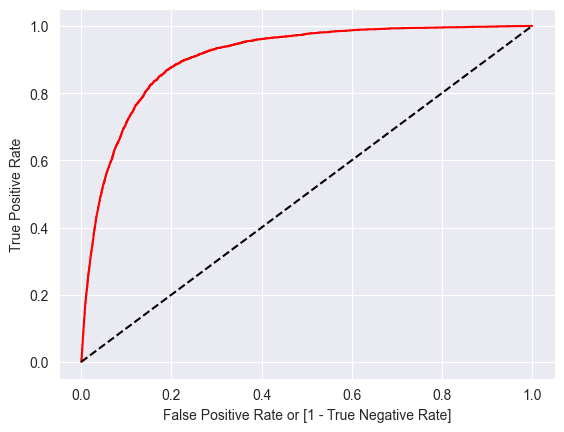

In [81]:
# Split the dataset into features (X) and target (y)
X = norm_final_df.drop("y", axis=1)
Y = norm_final_df["y"]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model1.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred1)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### The area under the 0.6552 which is in the acceptable range. But still model need to be improved using other classification techniques.

### Model building from Tree based feature selection using random forest classifier   

Original Accuracy: 0.9056728961627778


Text(0.5, 0, 'mean accuracy decrease')

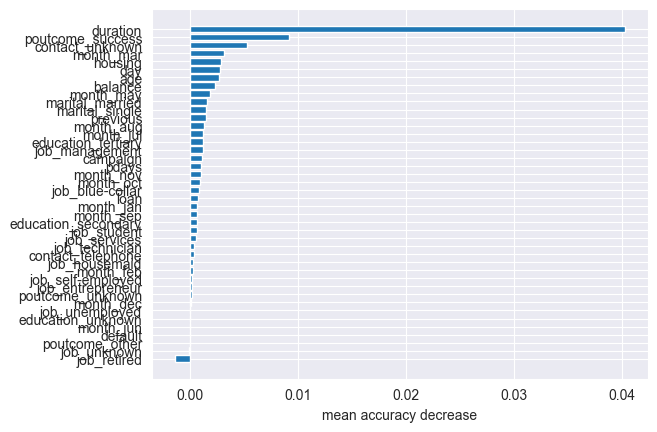

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Split the dataset into features (X) and target (y)
X = norm_final_df.drop("y", axis=1)
y = norm_final_df["y"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a classification model (Random Forest in this case)
model4 = RandomForestClassifier()

# Fit the model on the training data
model4.fit(X_train, y_train)

# Calculate accuracy on the testing data
y_pred4 = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
print("Original Accuracy:", accuracy)

# Calculate permutation importance
perm_importance = permutation_importance(model4, X_test, y_test, n_repeats=30, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("mean accuracy decrease")

### From the above model you can see that the performance of the model has increased and you can also see which are all the important features which are required for model building. Except those features you can ignore other fetures while model building and can increase the efficiency of the model. 

### ROC Curve for the model built using Random Forest Regression and normaliazed dataset.

0.6956707592023267


Text(0, 0.5, 'True Positive Rate')

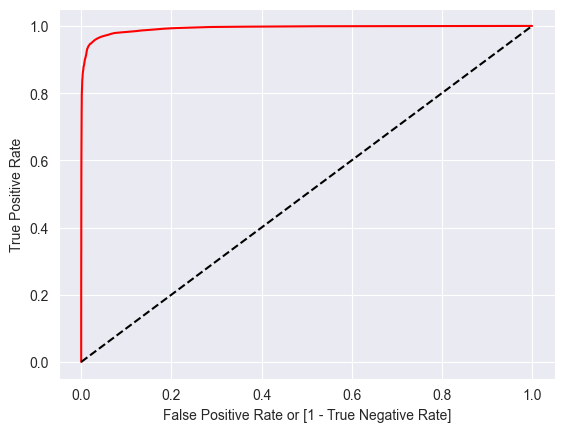

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model4.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred4)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### The area under the 0.6887 which is in the acceptable range. Compare to the previous model the auc has increased. Hence we can conclude that this model works better than the previous model.

## Final dataset  

In [85]:
final_df = norm_final_df.copy()

In [87]:
final_df.head(2)

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,0.092259,0.133333,0.067251,0.0,0.0,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.337662,0.073067,0.133333,0.038907,0.0,0.0,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Final Model

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target (y)
X = final_df.drop("y", axis=1)
y = final_df["y"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LogisticRegression model
final_model = LogisticRegression()

# Fit the model on the training data
final_model.fit(X_train, y_train)

# Predict on the test data
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.898595598805706
